# Introduction to 2D plots

This notebook demonstrates how plot some latitude by longitude maps of some key surface variables. Most features are available in the preinstalled `geog0111` environment. 

But updated plotting that removes white meridional lines around the Greenwich Meridian, requires the `geog0121` virtual environment. Instructions about how to install this environment (using `conda` and the `environment.yml` file) are provided in the handbook.

### Import packages and define fucntions for calculations

In [7]:
'''Import packages for loading data, analysing, and plotting'''

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
import cartopy
import os
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Change in annual temperature under the SSP585 scenario
Here we use the CVDP output files to look at the change in annual mean surface temperature

In [2]:
#Set some variables to decide what to plot
end_period='2071-2100'
start_period='1851-1900'
ssp='ssp585'

In [3]:
#Specify the paths to the data files. These lines are specific to UCL's JupyterHub - please see the bottom of the notebook for equivalent code blocks on other systems 
shared_summary_directory='~/geog0121_shared_space/UKESM1_summary_files'
filename_a='%s/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%(shared_summary_directory,ssp,end_period)
filename_b='%s/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%(shared_summary_directory,ssp,start_period)

In [4]:
# load files
expt_a_file=xr.open_dataset(filename_a,decode_times=False)
expt_b_file=xr.open_dataset(filename_b,decode_times=False)
# load the coordinates
lat=expt_a_file['lat']
lon=expt_a_file['lon']
# load the variables themselves
variable_name='tas_spatialmean_ann'
expt_a=expt_a_file[variable_name]
expt_b=expt_b_file[variable_name]

# create the difference
diff=expt_a-expt_b
diff

<xarray.DataArray 'tas_spatialmean_ann' (lat: 144, lon: 192)>
array([[ 7.0073814,  7.001259 ,  6.9998207, ...,  7.013077 ,  7.0112457,
         7.0074615],
       [ 6.8237457,  6.8257446,  6.8285027, ...,  6.81802  ,  6.820095 ,
         6.821659 ],
       [ 6.734894 ,  6.73473  ,  6.7335396, ...,  6.7306595,  6.73246  ,
         6.7352486],
       ...,
       [22.505598 , 22.52309  , 22.545275 , ..., 22.457348 , 22.467459 ,
        22.487543 ],
       [22.83106  , 22.844997 , 22.860886 , ..., 22.780483 , 22.79882  ,
        22.815886 ],
       [23.074162 , 23.07485  , 23.076075 , ..., 23.072771 , 23.073957 ,
        23.073874 ]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon      (lon) float64 0.9375 2.812 4.688 6.562 ... 353.4 355.3 357.2 359.1

### Using xarray's simplest plotting routine

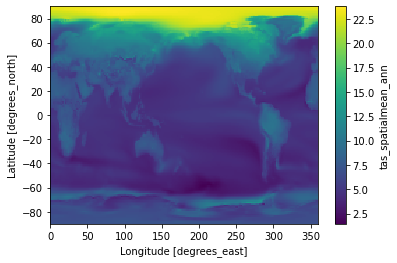

In [5]:
diff.plot()

Whilst this plot clearly show what is going on. It is missing several useful features:
* A sensible colormap
* The coastline (or country borders) to help orientate you
* A logical scale for the colors to use

Whatever you decide to plot, it is always worth selecting a relevant colormap. All of the easily available colormaps can be seen at [Matplotlib's reference pages](https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html). For this instance, I am picking a sequential one that goes from yellow-orange-red (YlOrRd), with the keyword `cmap=` in the plot call.

Here I am going to plot every 2 degrees above preindustrial, using both the `levels` keyword and a call to `np.linspace()`, which subdivides the range from 0-20 (inclusive) into 11 different levels. 

Adding the map is a little trickier. We shall use the Robinson projection, but we need to specify that first along with a load of other map-related options to creates some axes. We then also need to pass these to the plotting routine, as well as telling it us the Plate Carree method to map the locations onto the Robinson projection. 

A final thing to note is that we've switched to using `contourf` instead of the default option (actually `pcolormesh`). This is needed for the maps, and will otherwise throw up errors like 
> 'GeoAxesSubplot' object has no attribute '_hold'


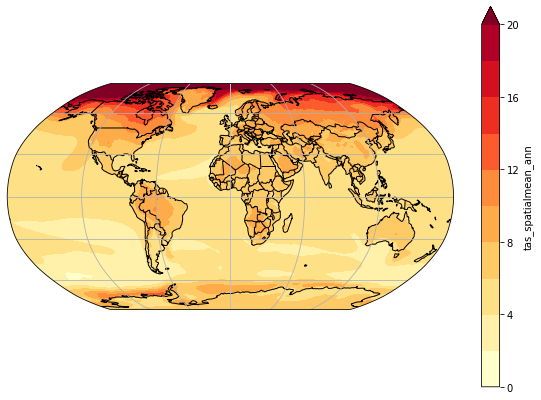

In [8]:
# Define the map projection through an "axes" call
plt.figure(figsize=(10,7)) #make the map itself nice and big
projection = cartopy.crs.Robinson() #specify the Robinson projection
ax = plt.axes(projection=projection) #create the axes
ax.coastlines() # add the coastlines
ax.gridlines() # add some gray gridlines 
ax.add_feature(cartopy.feature.BORDERS) #add the country borders

# Now overplot the map onto these axes. 
fig=diff.plot.contourf(ax=ax, transform=cartopy.crs.PlateCarree(), \
                       cmap='YlOrRd', \
                       levels=np.linspace(0,20,11))

# [note that its given a name of `fig` through the =, so that it can saved later]



This figure is roughly equivalent to the RCP8.5 panel in the Summary for Policy Makers of the AR5 Synthesis report (https://www.ipcc.ch/report/ar5/syr/summary-for-policymakers/spm-07_rev1-01/):

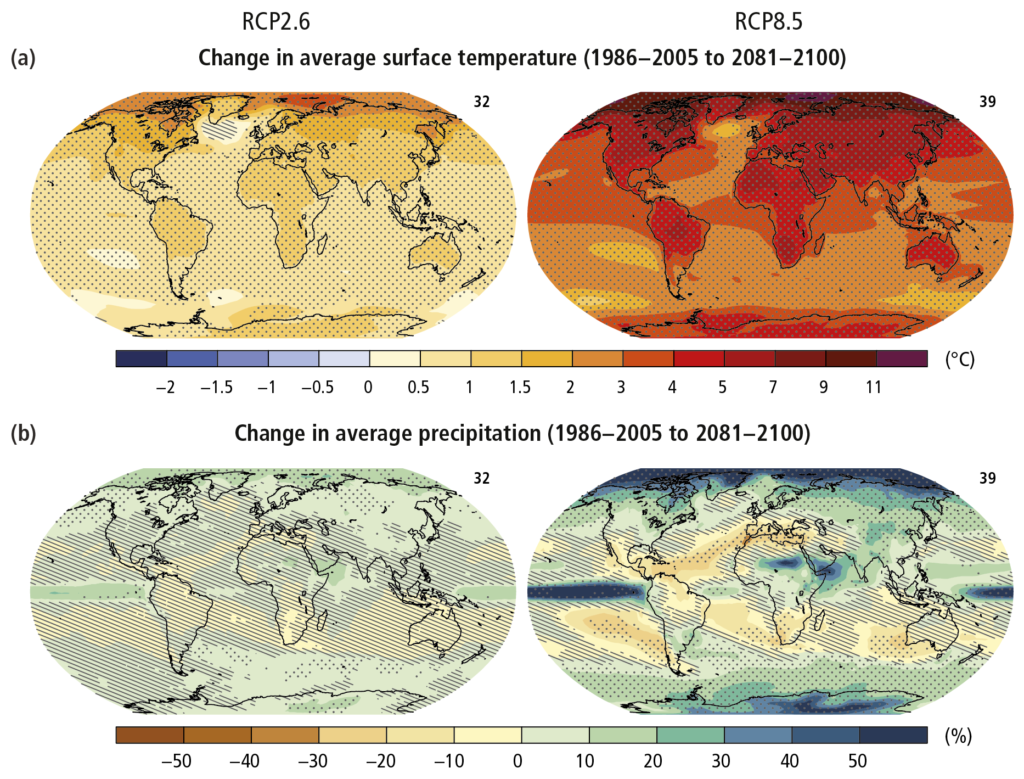

The color scale is obviously different. We are also using a single simultion (UKESM1) instead of an ensemble mean. Our baseline from whcih we are calculating the change is also different. You can certainly see the main features being replicated though.



# Comparison between different scenarios

The primary figure shown to demonstrate future climate change in the IPCC looks at the development of global mean temperature under two different scenarios:

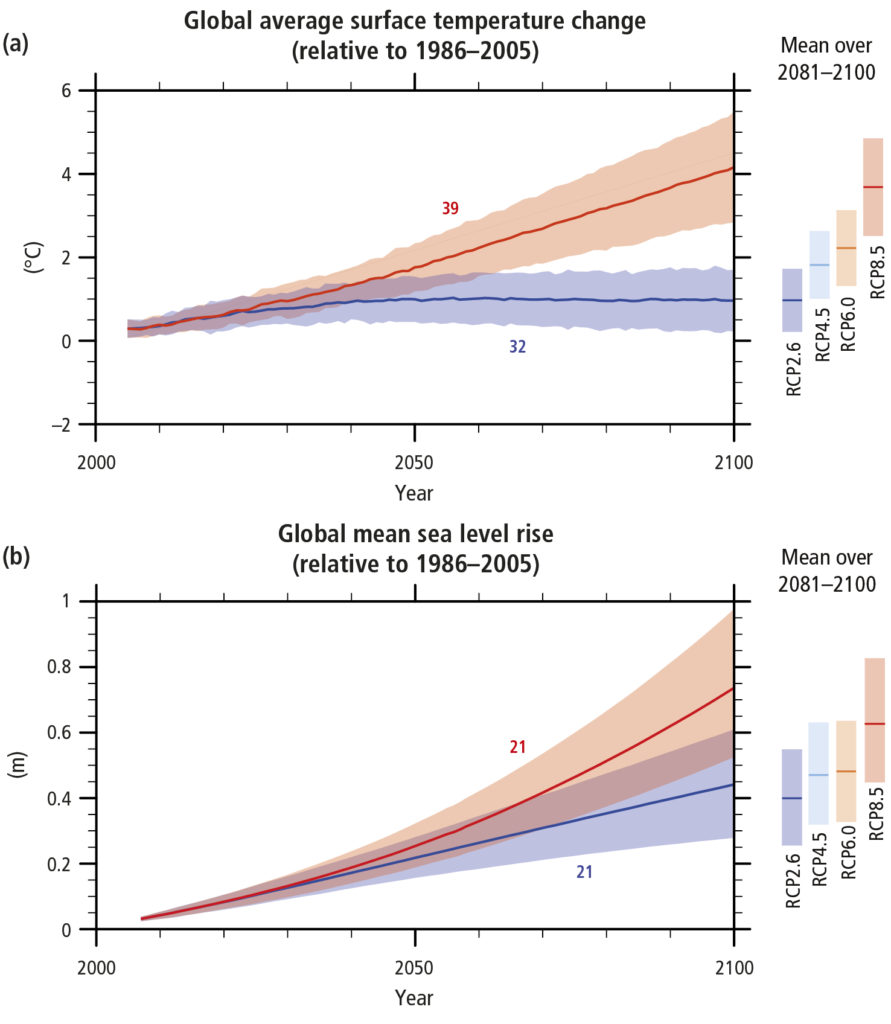

In [9]:
# Load in the two scenarios...
shared_summary_directory='~/geog0121_shared_space/UKESM1_summary_files'
filename126='%s/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%(shared_summary_directory,'ssp126','1981-2010')
filename585='%s/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%(shared_summary_directory,'ssp585','1981-2010')

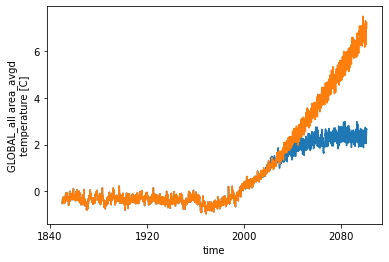

In [10]:
#Start with SSP126
# open the file to get the data
ssp126=xr.open_dataset(filename126)
# create a plot of the variable called ipcc_GLOBAL_all_tas
ssp126.ipcc_GLOBAL_all_tas.plot() #by default the first line is blue

#Then move onto SSP585
# open the file to get the data
ssp585=xr.open_dataset(filename585)
# create a plot of the variable called ipcc_GLOBAL_all_tas
ssp585.ipcc_GLOBAL_all_tas.plot() #by default the second line is orange

This figure obvious looks slightly different, because we are using a single model simulation. We can't do anything about that. 

But we can make another couple of edits to make it more similar...

## Machine specific options

This code above is intended to be run on UCL's JupyterHub facility. However it might happen that you need to run this notebook on a different machine. In the cells below, you will find the code to run on the cluster in UCL Geography and on an python installation on your own machine respectively.

In [ ]:
#FOR GEOGRAPHY CLUSTER: define filenames and their directories
directory_a='/data/aod/cvdp_cmip6/geog0121/UKESM1-0-LL_ssps.wrt_%s' %end_period
filename_a='%s/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%(directory_a,ssp,end_period)
directory_b='/data/aod/cvdp_cmip6/geog0121/UKESM1-0-LL_ssps.wrt_%s' %start_period
filename_b='%s/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%(directory_b,ssp,start_period)

filename126='%s/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%('/data/aod/cvdp_cmip6/geog0121/UKESM1-0-LL_ssps.wrt_1981-2010/','ssp126','1981-2010')
filename585='%s/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%('/data/aod/cvdp_cmip6/geog0121/UKESM1-0-LL_ssps.wrt_1981-2010/','ssp585','1981-2010')

In [ ]:
#FOR YOUR OWN LAPTOP: define filenames, and download if required
filename_a='Data/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%('ssp585','2071-2100')
filename_b='Data/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%('ssp585','1851-1900')
filename126='%s/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%('ssp126','1981-2010')
filename585='%s/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%('ssp585','1981-2010')

#Download the files if they are not already here
import os
import urllib
if not os.path.isfile(filename_a):
    print('Downloading %s' %(filename_a))
    !mkdir Data
    url_a='http://www2.geog.ucl.ac.uk/~ucfaccb/geog0121/downloads/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%('ssp585','2071-2100')
    urllib.request.urlretrieve(url_a, filename_a)    
    
if not os.path.isfile(filename_b):
    print('Downloading %s' %(filename_b))
    url_b='http://www2.geog.ucl.ac.uk/~ucfaccb/geog0121/downloads/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%('ssp585','1851-1900')
    urllib.request.urlretrieve(url_b, filename_b)
    
if not os.path.isfile(filename126):
    print('Downloading %s' %(filename126))
    !mkdir Data
    url_a='http://www2.geog.ucl.ac.uk/~ucfaccb/geog0121/downloads/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%('ssp126','1981-2010')
    urllib.request.urlretrieve(url_126, filename126)    

if not os.path.isfile(filename585):
    print('Downloading %s' %(filename585))
    !mkdir Data
    url_a='http://www2.geog.ucl.ac.uk/~ucfaccb/geog0121/downloads/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%('ssp585','1981-2010')
    urllib.request.urlretrieve(url_585, filename_585)    
